### Refenence
https://qiskit.org/documentation/tutorials/circuits/index.html

https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

In [131]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import ignis
import numpy as np
from qiskit import Aer

In [132]:
from typing import List

def Even_blocks(qc: QuantumCircuit, theta: List):
    lg = len(theta)
    lg_qc = qc.n_qubits
    if(lg != lg_qc): return
    
    for i in range(lg):
        qc.rz(theta[i], i)
        
    for i in range(lg - 1):
        for j in range(i + 1, lg):
            qc.cz(i, j)
    return

def Odd_blocks(qc: QuantumCircuit, theta: List):
    lg = len(theta)
    lg_qc = qc.n_qubits
    if(lg != lg_qc): return
    
    for i in range(lg):
        qc.rx(theta[i], i)
    return
    
def Layer(qc: QuantumCircuit, theta_o: List, theta_e: List):
    Odd_blocks(qc, theta_o)
    Even_blocks(qc, theta_e)

    

def Dist(v1, v2)->float:
    lg1 = len(v1)
    lg2 = len(v2)
    if(lg1 != lg2): return -1
    
    ans = np.linalg.norm(abs(v1 - v2)**2)
    return ans


In [133]:
# create a circuit

myqc = QuantumCircuit(4,2)
theta_o = np.pi *np.array( [.5, .5, 2, 2])
theta_e = np.pi *np.array( [.0, .0, .0, .0])

Layer(myqc, theta_o, theta_e)
Layer(myqc, theta_o, theta_e)
# myqc.measure_all()
myqc.draw()

<ipython-input-132-500047fad91b>:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  lg_qc = qc.n_qubits
<ipython-input-132-500047fad91b>:5: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  lg_qc = qc.n_qubits


┌──────────┐┌───────┐         ┌──────────┐┌───────┐                       »
q_0: ┤ RX(pi/2) ├┤ RZ(0) ├─■──■──■─┤ RX(pi/2) ├┤ RZ(0) ├───────────────────────»
     ├──────────┤├───────┤ │  │  │ └──────────┘└───────┘┌──────────┐ ┌───────┐ »
q_1: ┤ RX(pi/2) ├┤ RZ(0) ├─■──┼──┼──────■──────────■────┤ RX(pi/2) ├─┤ RZ(0) ├─»
     ├─────────┬┘├───────┤    │  │      │          │    └──────────┘┌┴───────┴┐»
q_2: ┤ RX(2pi) ├─┤ RZ(0) ├────■──┼──────■──────────┼─────────■──────┤ RX(2pi) ├»
     ├─────────┤ ├───────┤       │                 │         │      ├─────────┤»
q_3: ┤ RX(2pi) ├─┤ RZ(0) ├───────■─────────────────■─────────■──────┤ RX(2pi) ├»
     └─────────┘ └───────┘                                          └─────────┘»
c: 2/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                             
«q_0: ────■─────■──■──────────
«         │     │  │          
«q_1: ────■─────┼──┼──■──■────
«     ┌───────┐ │  │  │  │    
«q_2: ┤ RZ(0) ├─■──┼──■──┼──■─
«     ├───────┤    │     │  │ 
«q_3: ┤ RZ(0) ├────■─────■──■─
«     └───────┘               
«c: 2/════════════════════════
«

In [136]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution
job = qiskit.execute(myqc, backend)
result = job.result()


In [137]:
# output state

outputstate = result.get_statevector(myqc, decimals=5)
print('out = ', outputstate)


# generate an arbitrary state
from random import*
phi = np.zeros(16, dtype = complex)
buf = 0
for i in range(16):
    phi[i] = random() + random() * 1j
    buf += abs(phi[i])**2
phi /= np.sqrt(buf)
print('\nphi = ', phi)
    
    
# calculate distance
dist = Dist(outputstate, phi)
print('\n distance = ', dist)

out =  [-5.000000e-01+0.000000e+00j  3.061617e-17-5.000000e-01j
  3.061617e-17-5.000000e-01j  5.000000e-01+6.123234e-17j
  0.000000e+00+0.000000e+00j -0.000000e+00+0.000000e+00j
 -0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j
  0.000000e+00+0.000000e+00j -0.000000e+00+0.000000e+00j
 -0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j
  0.000000e+00-0.000000e+00j -0.000000e+00+0.000000e+00j
 -0.000000e+00+0.000000e+00j -0.000000e+00+0.000000e+00j]

phi =  [0.21607145+0.1633432j  0.0839154 +0.03101512j 0.2820163 +0.18596411j
 0.1999746 +0.25910573j 0.07692987+0.23500714j 0.08128023+0.00314979j
 0.20221791+0.1155004j  0.05260802+0.13028908j 0.11114419+0.0860851j
 0.025557  +0.19471228j 0.17295166+0.27280274j 0.18549212+0.15849939j
 0.11378093+0.23910351j 0.30049116+0.26194978j 0.07447901+0.02283335j
 0.03728298+0.3113973j ]

 distance =  0.8747071664625437


In [138]:
from random import*
a = np.array([2, 3, 4 + 2j])
b = np.array([2, 3, 5 + 1j])

c = np.linalg.norm(abs(a - b)**2)
print(c)

2.0000000000000004


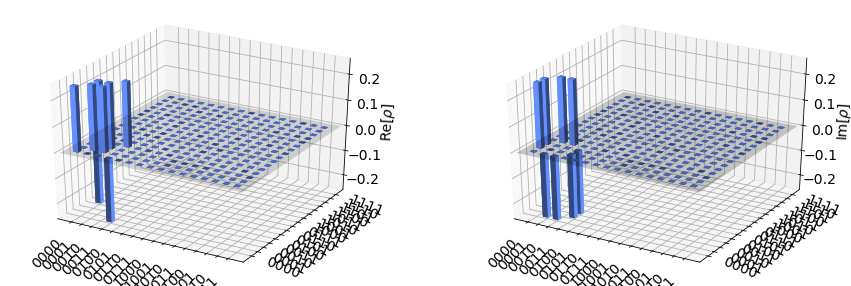

In [139]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [61]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')

# Create a Quantum Program for execution
job = qiskit.execute(myqc, backend)

result = job.result()

In [62]:
# Show the results
print(result.get_unitary(myqc, decimals=3))

[[-5.000000e-01+0.00000000e+00j -3.061617e-17-5.00000000e-01j
  -3.061617e-17-5.00000000e-01j -5.000000e-01+6.12323400e-17j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j]
 [ 3.061617e-17-5.00000000e-01j  5.000000e-01+0.00000000e+00j
  -5.000000e-01+0.00000000e+00j  3.061617e-17+5.00000000e-01j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j
   0.000000e+00+0.00000000e+00j  0.000000e+00+0.00000000e+00j]
 [ 3.0

In [97]:
tm_qc = qiskit.ignis.verification.state_tomography_circuits(myqc, myqc.qubits[2], meas_labels='Pauli', meas_basis='Pauli')
print(len(tm_qc))
tm_qc[2].draw()

3


┌───────────┐  ┌──────────┐                    ░ ┌─┐          ░    
   q_0: ┤ RZ(pi/10) ├──┤ RZ(pi/2) ├──■──■──■───────────░─┤M├──────────░────
        └┬──────────┤ ┌┴──────────┤  │  │  │           ░ └╥┘┌─┐       ░    
   q_1: ─┤ RZ(pi/5) ├─┤ RZ(3pi/5) ├──■──┼──┼──■──■─────░──╫─┤M├───────░────
        ┌┴──────────┴┐├───────────┴┐    │  │  │  │     ░  ║ └╥┘┌─┐    ░ ┌─┐
   q_2: ┤ RZ(3pi/10) ├┤ RZ(7pi/10) ├────■──┼──■──┼──■──░──╫──╫─┤M├────░─┤M├
        ├───────────┬┘├───────────┬┘       │     │  │  ░  ║  ║ └╥┘┌─┐ ░ └╥┘
   q_3: ┤ RZ(2pi/5) ├─┤ RZ(4pi/5) ├────────■─────■──■──░──╫──╫──╫─┤M├─░──╫─
        └───────────┘ └───────────┘                    ░  ║  ║  ║ └╥┘ ░  ║ 
  c9: 1/══════════════════════════════════════════════════╬══╬══╬══╬═════╩═
                                                          ║  ║  ║  ║     0 
                                                          ║  ║  ║  ║       
   c: 2/══════════════════════════════════════════════════╬══╬══╬══╬═══════
                                                          ║  ║  ║  ║       
meas: 4/══════════════════════════════════════════════════╩══╩══╩══╩═══════
                                                          0  1  2  3